<a href="https://www.kaggle.com/code/subhajeetdas/customer-segmentation-classification?scriptVersionId=125128319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


# Import Dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/customer-segmentation/Train.csv")
test_df = pd.read_csv("/kaggle/input/customer-segmentation/Test.csv")

In [3]:
df = pd.concat([train_df, test_df])

In [4]:
df.head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


# Data Cleaning

In [5]:
# dropping the rows having NaN values
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8819 non-null   int64  
 1   Gender           8819 non-null   object 
 2   Ever_Married     8819 non-null   object 
 3   Age              8819 non-null   int64  
 4   Graduated        8819 non-null   object 
 5   Profession       8819 non-null   object 
 6   Work_Experience  8819 non-null   float64
 7   Spending_Score   8819 non-null   object 
 8   Family_Size      8819 non-null   float64
 9   Var_1            8819 non-null   object 
 10  Segmentation     8819 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 826.8+ KB


In [7]:
df['Segmentation'].value_counts()

D    2388
A    2308
C    2101
B    2022
Name: Segmentation, dtype: int64

In [8]:
print("Gender: ", df['Gender'].unique())
print("Ever_Married: ", df['Ever_Married'].unique())
print("Graduated: ", df['Graduated'].unique())

Gender:  ['Male' 'Female']
Ever_Married:  ['No' 'Yes']
Graduated:  ['No' 'Yes']


In [9]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Ever_Married'] = df['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Graduated'] = df['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
df['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [11]:
df['Spending_Score'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Spending_Score'].replace(to_replace = 'Average', value = 1, inplace = True)
df['Spending_Score'].replace(to_replace = 'High', value = 2, inplace = True)

In [12]:
df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [13]:
df['Var_1'].replace(to_replace = 'Cat_1', value = 1, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_2', value = 2, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_3', value = 3, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_4', value = 4, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_5', value = 5, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_6', value = 6, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_7', value = 7, inplace = True)

In [14]:
df['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [15]:
df['Segmentation'].replace(to_replace = 'A', value = 0, inplace = True)
df['Segmentation'].replace(to_replace = 'B', value = 1, inplace = True)
df['Segmentation'].replace(to_replace = 'C', value = 2, inplace = True)
df['Segmentation'].replace(to_replace = 'D', value = 3, inplace = True)

In [16]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,4,3
2,466315,0,1,67,1,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,6,1
5,461319,1,1,56,0,Artist,0.0,1,2.0,6,2
6,460156,1,0,32,1,Healthcare,1.0,0,3.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,0,0,35,1,Entertainment,1.0,0,2.0,6,3
2622,467954,1,0,29,0,Healthcare,9.0,0,4.0,6,1
2623,467958,0,0,35,1,Doctor,1.0,0,1.0,6,0
2625,467961,1,1,47,1,Executive,1.0,2,5.0,4,2


In [17]:
label ={0 : 'A', 1 : 'B', 2 : 'C', 3 : 'D'}

Text(0.5, 1.08, 'Pair Plot Analysis')

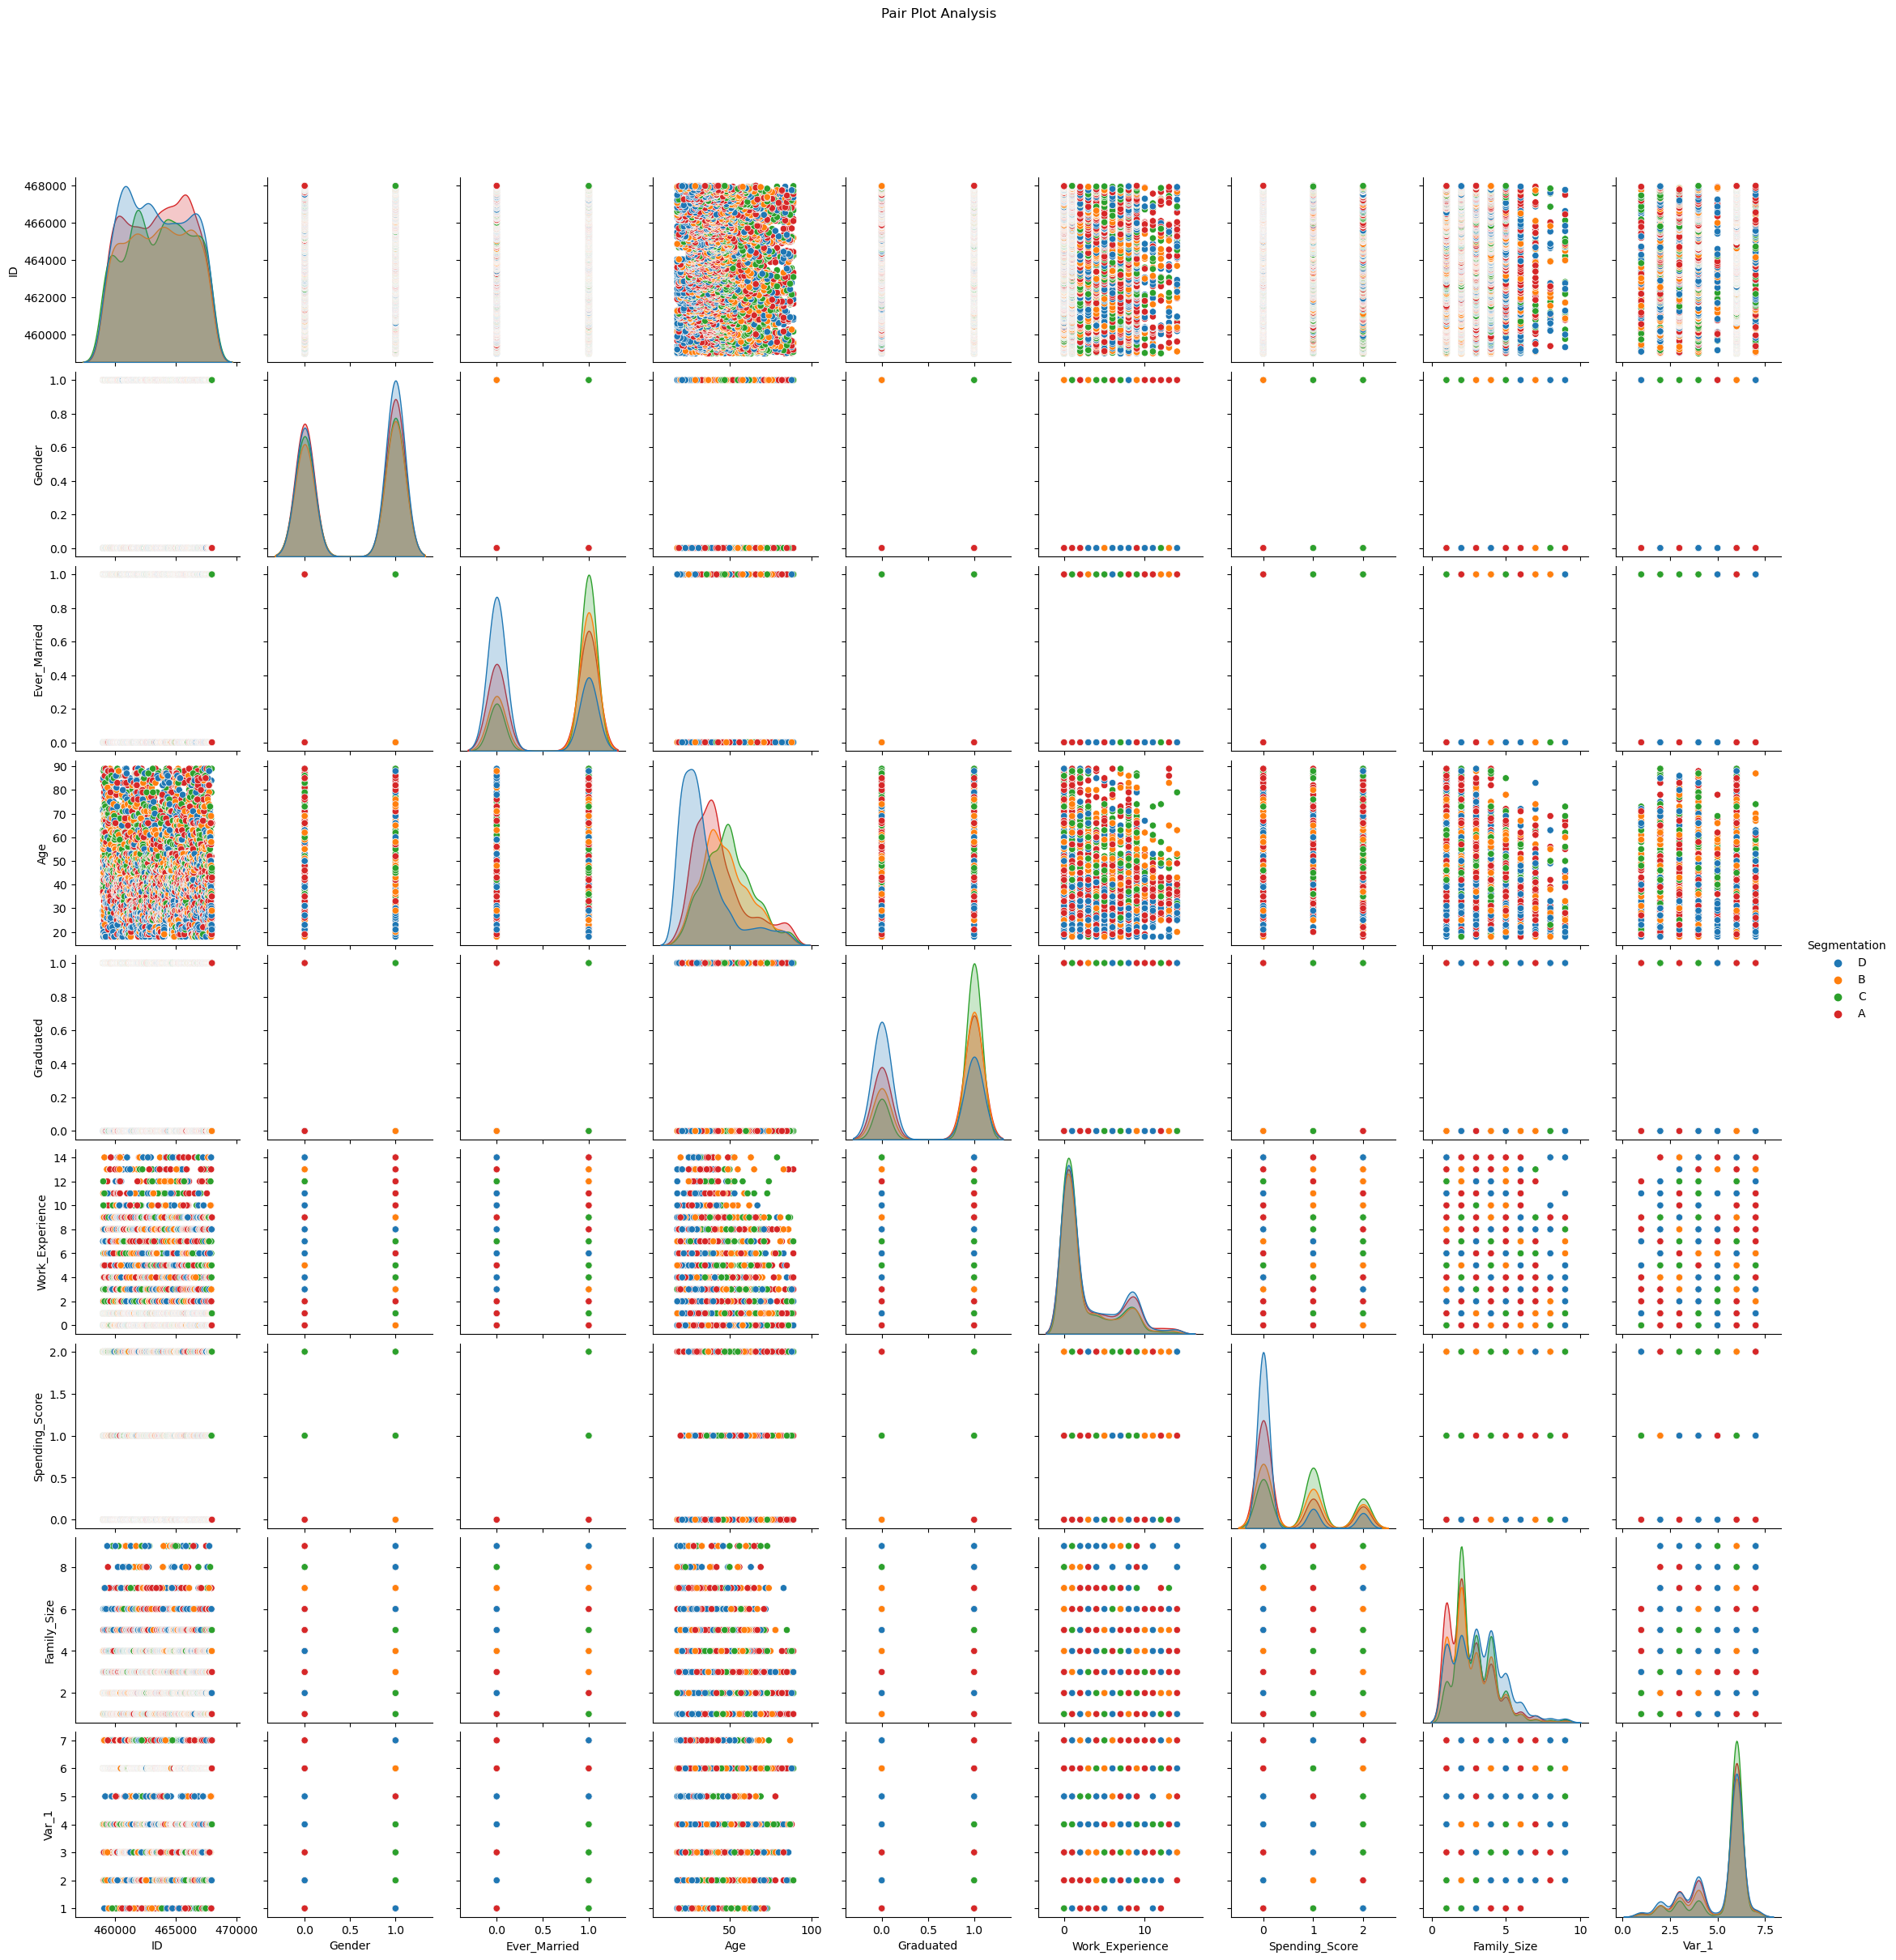

In [18]:
plotdata = sns.pairplot(df.replace({'Segmentation' : label}), hue = 'Segmentation')
plotdata.fig.suptitle("Pair Plot Analysis", y = 1.08)

In [19]:
x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']].values
x

array([[ 1.,  0., 22., ...,  0.,  4.,  4.],
       [ 0.,  1., 67., ...,  0.,  1.,  6.],
       [ 1.,  1., 67., ...,  2.,  2.,  6.],
       ...,
       [ 0.,  0., 35., ...,  0.,  1.,  6.],
       [ 1.,  1., 47., ...,  2.,  5.,  4.],
       [ 0.,  0., 43., ...,  0.,  3.,  7.]])

In [20]:
y = df.iloc[:, 10].values
y

array([3, 1, 1, ..., 0, 2, 0])

# Train & Test Spilitting

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [22]:
print(x_train.shape)

(6173, 8)


# Logistic Regression

In [23]:
model = LogisticRegression(max_iter = 600)
model.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [24]:
y_pred_lr = model.predict(x_test)

In [25]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.4349962207105064


In [26]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.36      0.35      0.35       671
           1       0.28      0.10      0.14       613
           2       0.45      0.59      0.51       646
           3       0.52      0.67      0.58       716

    accuracy                           0.43      2646
   macro avg       0.40      0.43      0.40      2646
weighted avg       0.40      0.43      0.40      2646



In [27]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[235  61 150 225]
 [192  60 240 121]
 [110  57 379 100]
 [124  38  77 477]]


<AxesSubplot:>

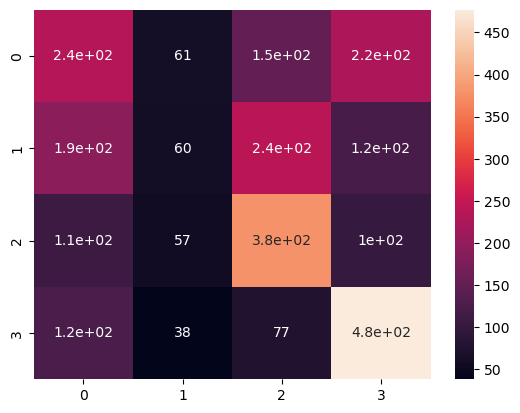

In [28]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True)

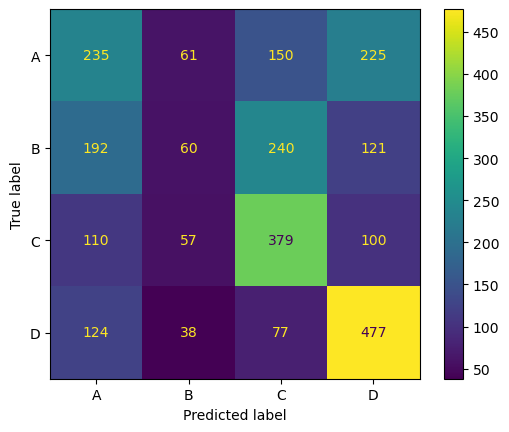

In [29]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()

# Random Forest

In [30]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [31]:
y_pred_rf = model_rf.predict(x_test)

In [32]:
print("Accuracy : ", accuracy_score(y_test, y_pred_rf))

Accuracy :  0.40249433106575966


In [33]:
cr = classification_report(y_test, y_pred_rf)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.35      0.34      0.34       671
           1       0.30      0.29      0.29       613
           2       0.43      0.43      0.43       646
           3       0.49      0.54      0.52       716

    accuracy                           0.40      2646
   macro avg       0.40      0.40      0.40      2646
weighted avg       0.40      0.40      0.40      2646



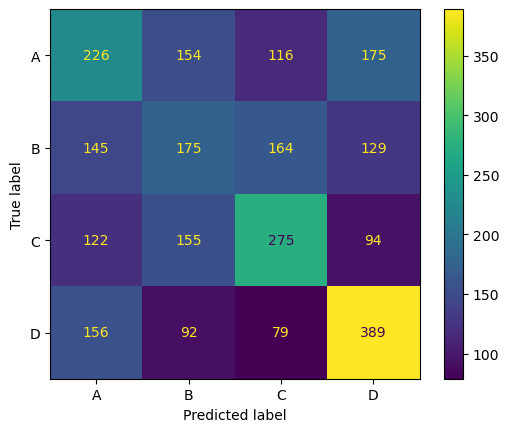

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()

# KNN

In [35]:
iteration = 25

In [36]:
error_rate = []
acc = []
scores = {}

for i in range(1,iteration):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn != y_test))
    scores[i] = metrics.accuracy_score(y_test, y_pred_knn)
    acc.append(metrics.accuracy_score(y_test, y_pred_knn))

scores

{1: 0.35789871504157217,
 2: 0.3295540438397581,
 3: 0.3707482993197279,
 4: 0.37566137566137564,
 5: 0.3832199546485261,
 6: 0.3907785336356765,
 7: 0.4002267573696145,
 8: 0.4032501889644747,
 9: 0.4002267573696145,
 10: 0.4089191232048375,
 11: 0.4089191232048375,
 12: 0.4074074074074074,
 13: 0.41232048374905517,
 14: 0.41572184429327286,
 15: 0.41496598639455784,
 16: 0.41496598639455784,
 17: 0.41723356009070295,
 18: 0.41685563114134544,
 19: 0.41798941798941797,
 20: 0.41987906273620557,
 21: 0.42252456538170824,
 22: 0.41685563114134544,
 23: 0.41798941798941797,
 24: 0.42290249433106575}

Minimum error:- 0.5770975056689343 at K = 23


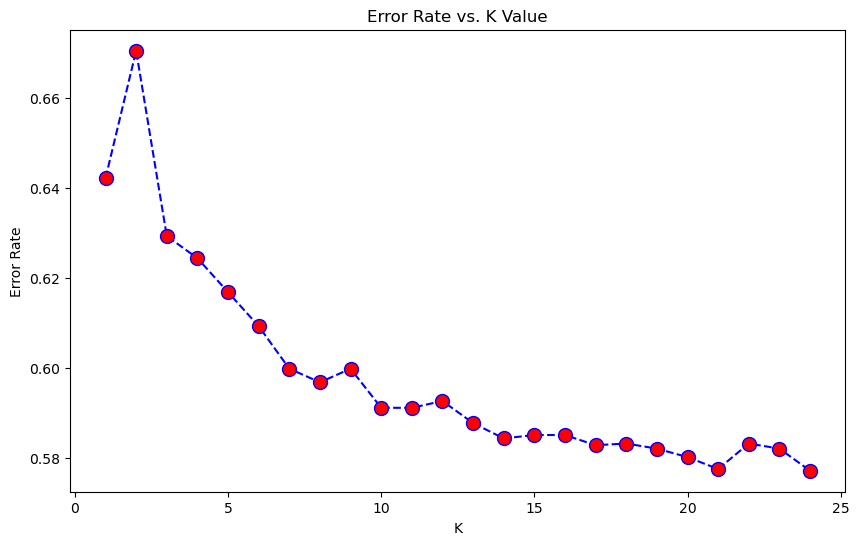

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration), error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.42290249433106575 at K = 23


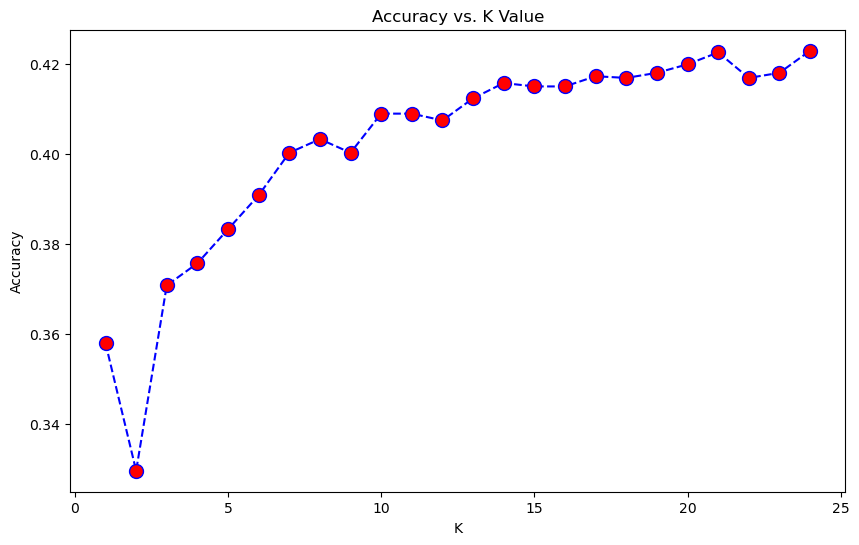

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,iteration),acc,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [39]:
model_knn = KNeighborsClassifier(n_neighbors = 23)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)

In [40]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.41798941798941797


In [41]:
cr = classification_report(y_test, y_pred_knn)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.35      0.37      0.36       671
           1       0.29      0.21      0.24       613
           2       0.43      0.48      0.45       646
           3       0.55      0.59      0.57       716

    accuracy                           0.42      2646
   macro avg       0.40      0.41      0.41      2646
weighted avg       0.41      0.42      0.41      2646



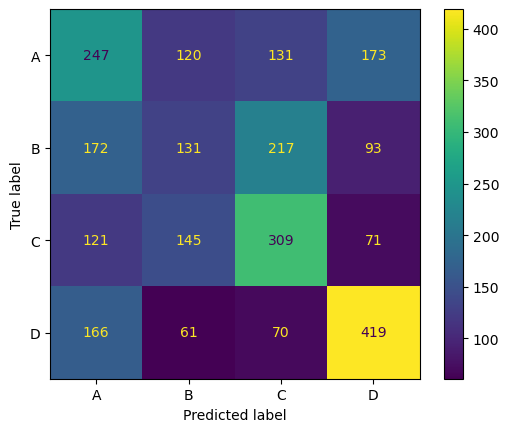

In [42]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()